# 1. Prepare data

In [42]:
# Import modules
import pandas as pd
import numpy as np
import math

In [43]:
# Loading modelling algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors    import KNeighborsRegressor
from sklearn.ensemble     import AdaBoostRegressor
from sklearn.ensemble     import RandomForestRegressor
 
# Loading tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import r2_score
 
# Loading visualisation modules
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
 
# Configure visualisations 
%matplotlib inline
 
# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [44]:
# Read data
diamonds = pd.read_csv('data\diamonds.csv')

In [45]:
# Review and clean the data (may be a repetitive task)
# remove unnecessary columns
diamonds.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [46]:
diamonds.drop(['Unnamed: 0'] , axis=1 , inplace=True)
diamonds.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [47]:
# review the data and get intuition about it
diamonds.shape
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<AxesSubplot: >

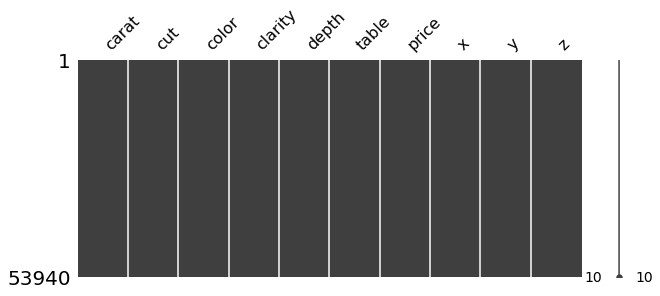

In [48]:
# find and eliminate nulls
diamonds.isnull().sum()
msno.matrix(diamonds, figsize=(10,4)) # just to visualize. no missing values.

In [49]:
# search for illogical values
diamonds.describe()


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [50]:
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]
len(diamonds[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)])
diamonds = diamonds[(diamonds[['x','y','z']] != 0).all(axis=1)]


In [51]:
# always check after execution
diamonds.loc[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


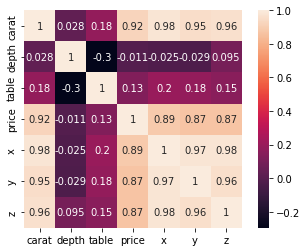

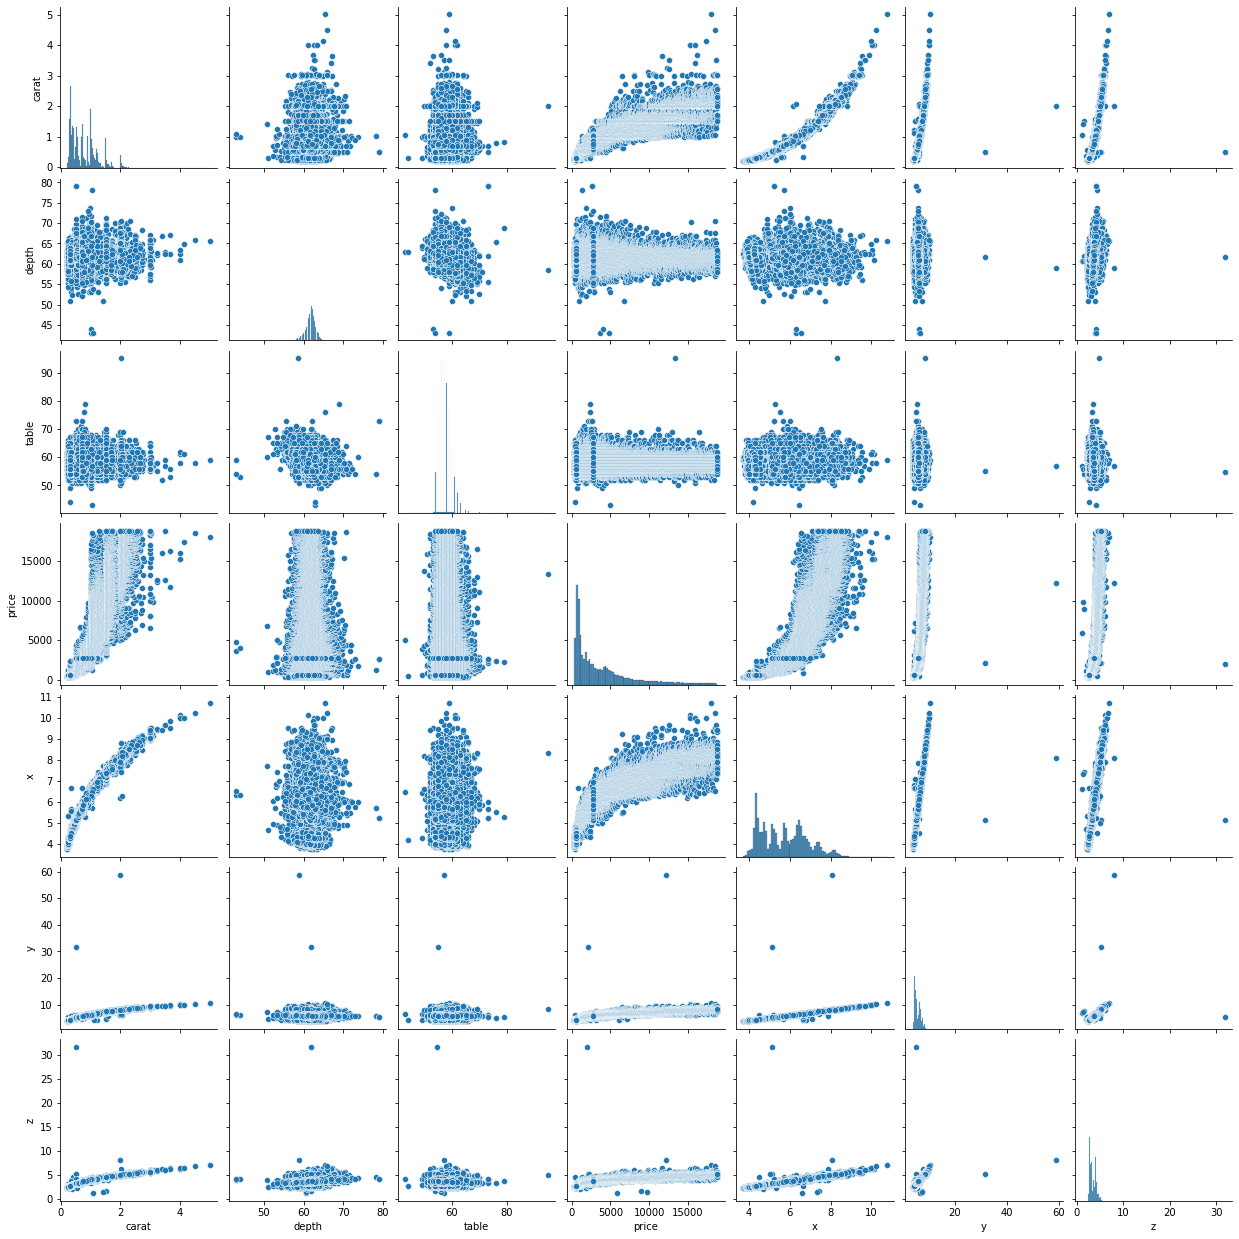

In [52]:
# Detect dependencies in the data
corr = diamonds.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)
sns.pairplot(diamonds)

(array([1.3092e+04, 1.0846e+04, 6.8450e+03, 3.9820e+03, 9.0050e+03,
        3.5410e+03, 2.7560e+03, 1.4020e+03, 2.8100e+02, 1.4940e+03,
        4.1000e+02, 1.4100e+02, 7.4000e+01, 1.1000e+01, 2.6000e+01,
        3.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.2   , 0.3924, 0.5848, 0.7772, 0.9696, 1.162 , 1.3544, 1.5468,
        1.7392, 1.9316, 2.124 , 2.3164, 2.5088, 2.7012, 2.8936, 3.086 ,
        3.2784, 3.4708, 3.6632, 3.8556, 4.048 , 4.2404, 4.4328, 4.6252,
        4.8176, 5.01  ]),
 <BarContainer object of 25 artists>)

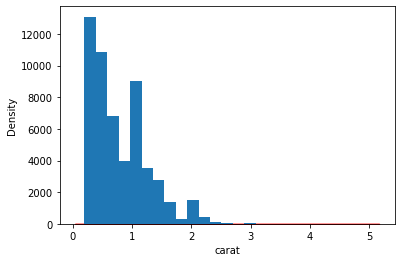

In [53]:
# check distribution
sns.kdeplot(diamonds['carat'], shade=True , color='r')
plt.hist(diamonds['carat'], bins=25)

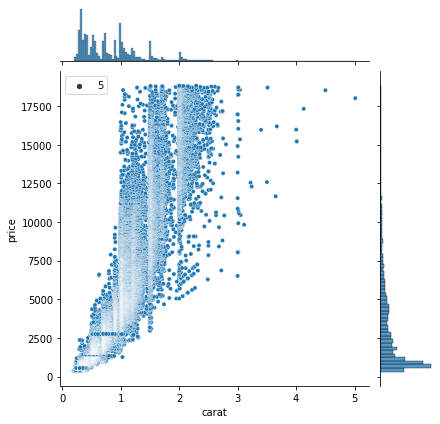

In [54]:
# check correlation graph
sns.jointplot(x='carat' , y='price' , data=diamonds , size=5)

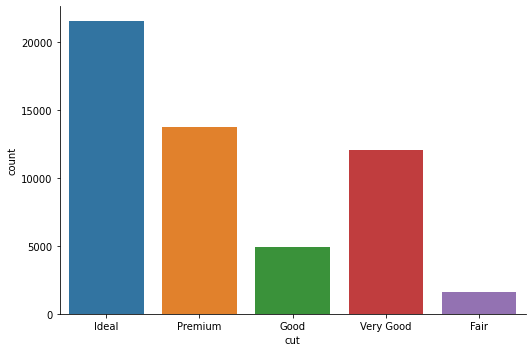

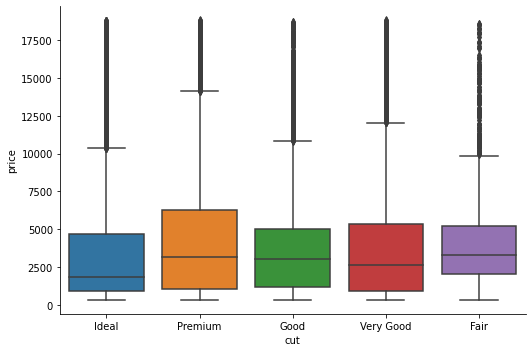

In [56]:
# analyze feature by feature, create hypotesis, try to find evidence
sns.catplot(x='cut', data=diamonds , kind='count',aspect=1.5)
sns.catplot(x='cut', y='price', data=diamonds, kind='box' ,aspect=1.5)

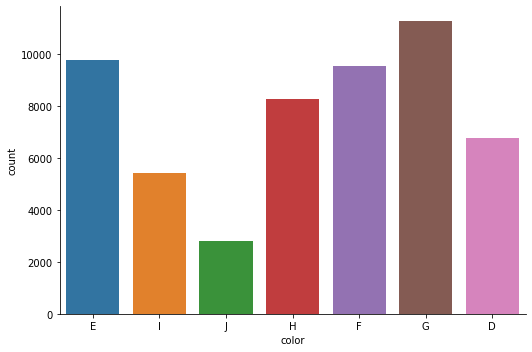

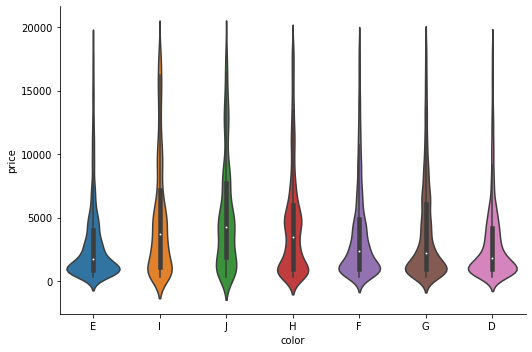

In [58]:
sns.catplot(x='color', data=diamonds , kind='count',aspect=1.5)
sns.catplot(x='color', y='price' , data=diamonds , kind='violin', 
               aspect=1.5)

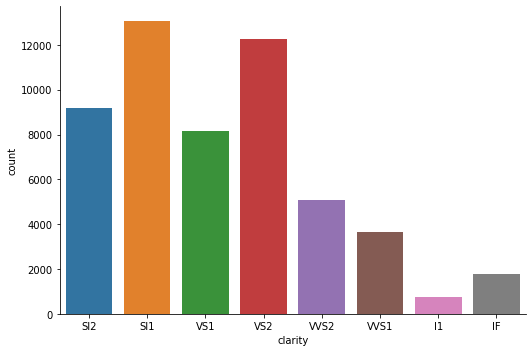

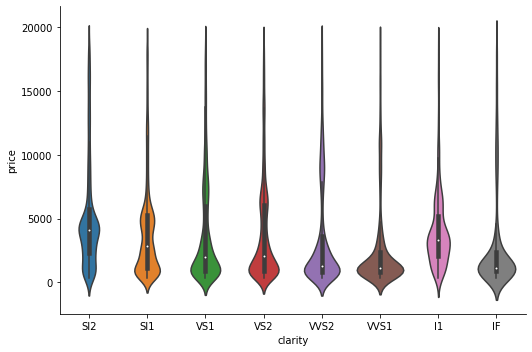

In [59]:
# try to use different visualisation methods
sns.catplot(x='clarity', data=diamonds , kind='count',aspect=1.5)
sns.catplot(x='clarity', y='price' , data=diamonds , kind='violin', 
               aspect=1.5)

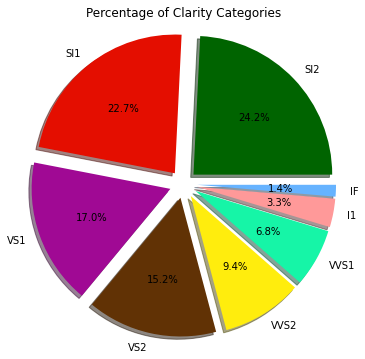

In [60]:
labels = diamonds.clarity.unique().tolist()
sizes = diamonds.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', 
          '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

<AxesSubplot: xlabel='clarity', ylabel='price'>

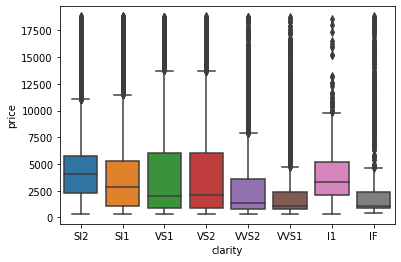

In [61]:
# try to find specific groups/classifications - repetitive process
sns.boxplot(x='clarity', y='price', data=diamonds)

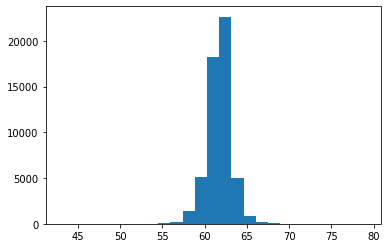

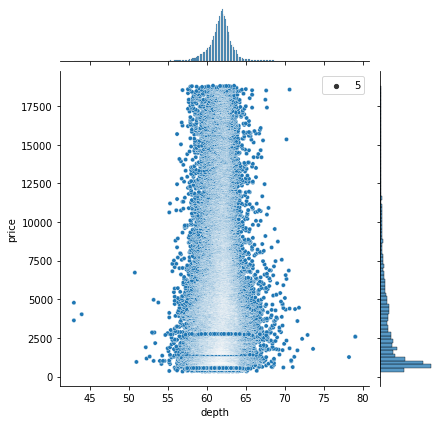

In [62]:
plt.hist('depth' , data=diamonds , bins=25)
sns.jointplot(x='depth', y='price', data=diamonds, size=5)

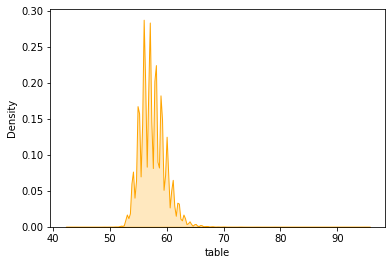

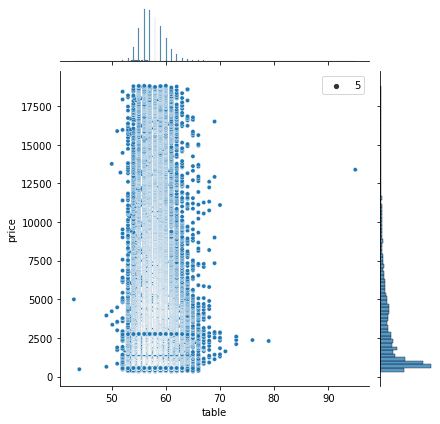

In [63]:
sns.kdeplot(diamonds['table'] ,shade=True , color='orange')
sns.jointplot(x='table', y='price', data=diamonds , size=5)